<a href="https://colab.research.google.com/github/tunkinr-135/Snake-Species-Identification-using-CNN/blob/main/thyroidcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/thyroid_cancer_risk_data.csv')

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

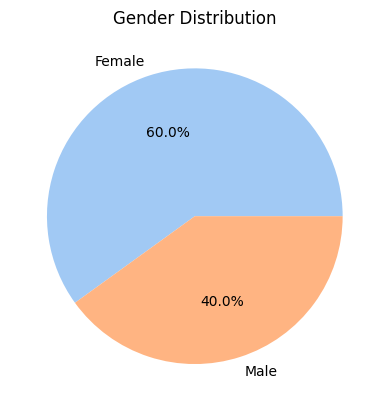

In [7]:
#@title Gender
df.groupby('Gender').size().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.gca().spines[['top', 'right', 'bottom', 'left']].set_visible(False)
plt.ylabel('') #Remove y-label
plt.title('Gender Distribution')
plt.show()

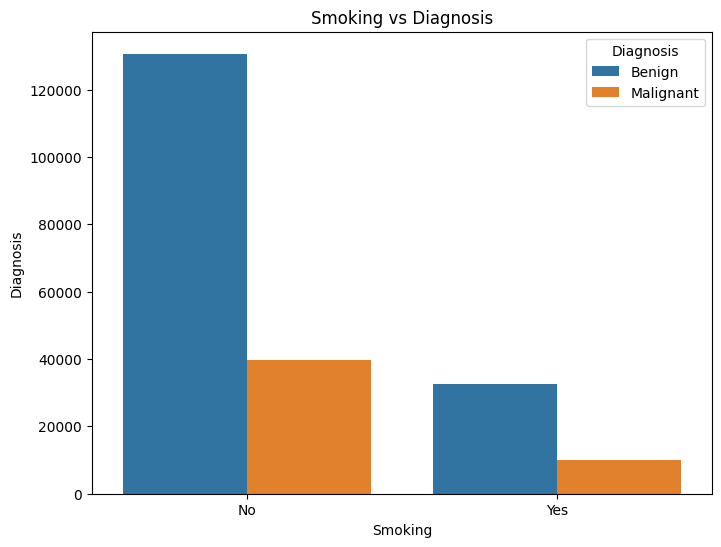

In [8]:
#@title Smoking vs Diagnosis
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Smoking', hue='Diagnosis')
plt.xlabel('Smoking')
plt.ylabel('Diagnosis')
plt.title('Smoking vs Diagnosis')
plt.show()

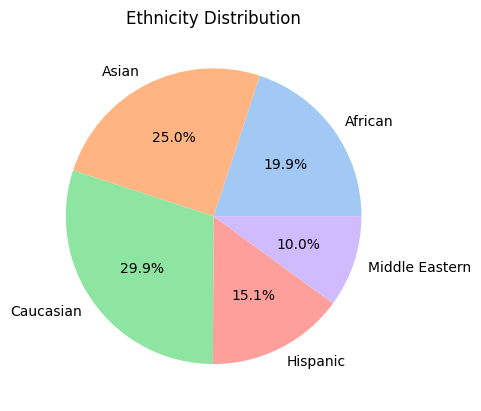

In [9]:
#@title Ethnicity
df.groupby('Ethnicity').size().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.gca().spines[['top', 'right', 'bottom', 'left']].set_visible(False)
plt.ylabel('')
plt.title('Ethnicity Distribution')
plt.show()

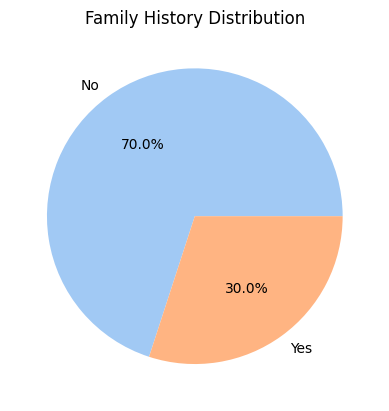

In [10]:
#@title Family_History
df.groupby('Family_History').size().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.gca().spines[['top', 'right', 'bottom', 'left']].set_visible(False)
plt.ylabel('')
plt.title('Family History Distribution')
plt.show()

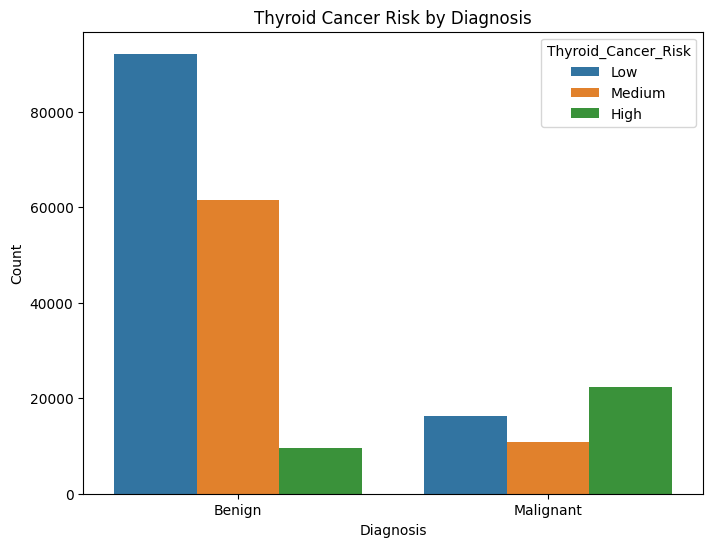

In [11]:
#@title Thyroid Cancer Risk by Diagnosis
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Diagnosis', hue='Thyroid_Cancer_Risk')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Thyroid Cancer Risk by Diagnosis')
plt.show()

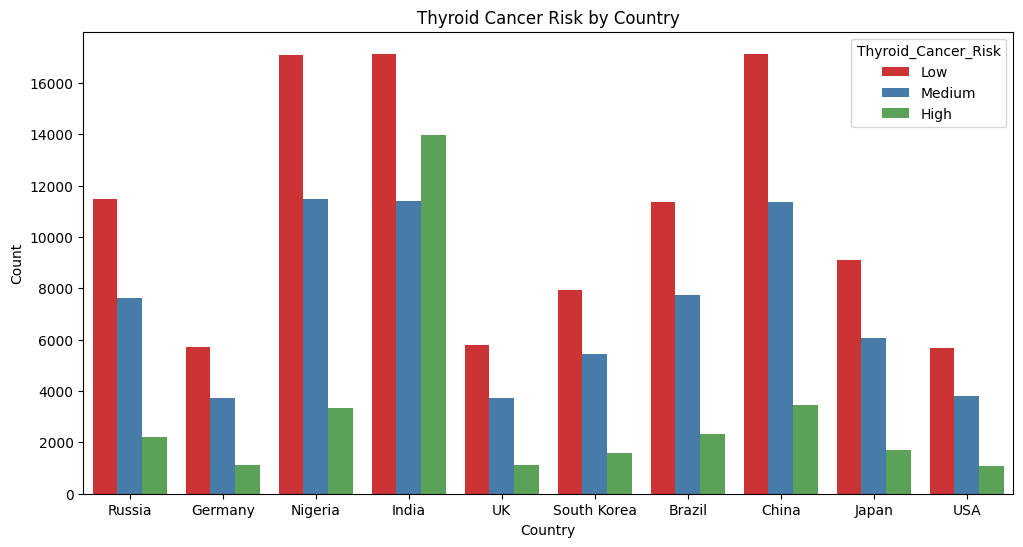

In [12]:
#@title Risk by Country
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Country', hue='Thyroid_Cancer_Risk', palette='Set1')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Thyroid Cancer Risk by Country')
plt.show()

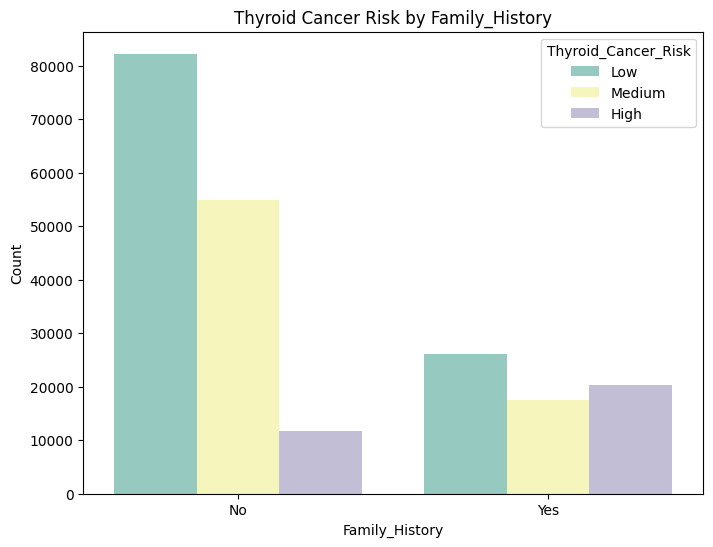

In [13]:
#@title Risk by Family_History
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Family_History', hue='Thyroid_Cancer_Risk', palette='Set3')
plt.xlabel('Family_History')
plt.ylabel('Count')
plt.title('Thyroid Cancer Risk by Family_History')
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [15]:
df.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


In [16]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Country,0
Ethnicity,0
Family_History,0
Radiation_Exposure,0
Iodine_Deficiency,0
Smoking,0
Obesity,0


In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.drop('Patient_ID',axis=1,inplace=True)

In [19]:
#converting gender from categorical to numerical
df['Gender'] = df['Gender'].apply(lambda x: 1 if x=='Female' else 2)

In [20]:
#converting yes to 1 and no to 0 for all features(family_history,radiation_exposure, iodine_deficiency, smoking, obesity and diabetes)
df = df.map(lambda x : {"Yes":1,"No":0}.get(x,x))

In [21]:
temp = df.groupby('Country').groups.keys()
data = {}
for i, key in enumerate(temp):
  data[key] = i + 1

df['Country'] = df['Country'].apply(lambda x: data[x])

In [22]:
df['Ethnicity'].value_counts()
temp = df.groupby('Ethnicity').groups.keys()
data = {}
for i, key in enumerate(temp):
  data[key] = i + 1

df['Ethnicity']=df['Ethnicity'].apply(lambda x: data[x])

In [23]:
def changeThyroid_Cancer_Risk(a):
  return {
      'Low':1,
      'Medium':2,
      'High':3
  }.get(a,a)
df['Thyroid_Cancer_Risk']=df['Thyroid_Cancer_Risk'].apply(changeThyroid_Cancer_Risk)

In [24]:
ndf = df.copy()
ndf.drop('Diagnosis',axis=1,inplace=True)

In [25]:
#@title function to evaluate model
res = {}
def evaluate_model(model,y_test, y_pre):
    """
    to evaluate the model

    """
    results = {}

    accuracy = accuracy_score(y_test, y_pre)
    results['accuracy'] = accuracy

    f1 = f1_score(y_test, y_pre, average='weighted')
    results['f1_score'] = f1

    recall = recall_score(y_test, y_pre, average='weighted')
    results['recall'] = recall

    precision = precision_score(y_test, y_pre, average='weighted')
    results['precision'] = precision
    res[model] = results
    return results

In [26]:
#@title  Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(ndf,df['Diagnosis'], test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (170152, 15)
Shape of X_test: (42539, 15)
Shape of y_train: (170152,)
Shape of y_test: (42539,)


In [27]:
df.describe()

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk
count,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,51.918497,1.400412,4.856924,2.701882,0.300083,0.149795,0.249272,0.199496,0.30037,0.200258,5.045102,2.001727,8.246204,2.503403,1.640394
std,21.632815,0.489983,2.562669,1.229211,0.458295,0.356871,0.432593,0.399622,0.45842,0.400194,2.860264,0.866248,2.164188,1.444631,0.728207
min,15.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.100000,0.500000,4.500000,0.000000,1.000000
25%,33.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.570000,1.250000,6.370000,1.250000,1.000000
50%,52.000000,1.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,5.040000,2.000000,8.240000,2.510000,1.000000
75%,71.000000,2.000000,7.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,7.520000,2.750000,10.120000,3.760000,2.000000
max,89.000000,2.000000,10.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,10.000000,3.500000,12.000000,5.000000,3.000000


In [28]:
df.tail(20)

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
212671,35,1,5,2,0,0,1,0,0,0,1.83,1.68,11.56,3.58,1,Benign
212672,77,1,1,3,0,1,0,1,0,0,6.72,1.05,10.04,4.33,1,Benign
212673,35,1,2,4,1,0,0,0,0,0,0.74,2.41,10.70,0.36,2,Benign
212674,56,1,7,3,1,0,0,0,0,0,4.03,1.40,10.79,3.30,1,Malignant
212675,31,1,7,3,1,0,1,0,1,0,3.37,3.04,9.68,1.09,1,Benign
212676,56,2,5,4,0,1,0,0,0,0,6.36,2.24,11.82,4.86,2,Benign
212677,44,2,2,4,0,0,0,0,0,0,0.33,2.88,9.36,0.25,1,Benign
212678,71,1,8,1,1,0,0,0,0,0,8.92,1.61,8.73,4.03,2,Benign
212679,54,1,6,4,0,0,1,0,0,0,0.11,2.87,8.37,1.95,2,Benign
212680,57,1,7,1,1,0,0,0,1,0,5.93,1.26,4.91,0.47,1,Benign


In [29]:
#@title Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
evaluate_model('LogisticRegression',y_test, y_pre)
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

      Benign       0.85      0.94      0.89     32615
   Malignant       0.69      0.43      0.53      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.71     42539
weighted avg       0.81      0.82      0.81     42539



In [30]:
#@title KNN
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
evaluate_model('KNN',y_test, y_pre)
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

      Benign       0.81      0.95      0.87     32615
   Malignant       0.61      0.26      0.36      9924

    accuracy                           0.79     42539
   macro avg       0.71      0.60      0.62     42539
weighted avg       0.76      0.79      0.75     42539



In [31]:
#@title Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
evaluate_model('DecisionTree',y_test, y_pre)
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

      Benign       0.81      0.80      0.80     32615
   Malignant       0.37      0.40      0.39      9924

    accuracy                           0.70     42539
   macro avg       0.59      0.60      0.59     42539
weighted avg       0.71      0.70      0.71     42539



In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Model
model = DecisionTreeClassifier()

# Cross-validation on training set
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV:", cv_scores.mean())

Cross-validation scores: [0.70385825 0.70321178 0.703732   0.70376139 0.70182192]
Mean CV: 0.7032770668820196


In [33]:
#@title Random Forest
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
evaluate_model('RandomForest',y_test, y_pre)
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

      Benign       0.85      0.94      0.89     32615
   Malignant       0.69      0.44      0.54      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.82      0.81     42539



In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Model
model = RandomForestClassifier()

# Cross-validation on training set
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV:", cv_scores.mean())

Cross-validation scores: [0.82595281 0.82721636 0.82727006 0.82747576 0.82724067]
Mean CV: 0.8270311303604508


In [35]:
#@title Gradient Boosting
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pre = model.predict(X_test)
evaluate_model('GradientBoosting', y_test, y_pre)
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

      Benign       0.85      0.94      0.89     32615
   Malignant       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539



In [36]:
#@title AdaBoost
model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pre = model.predict(X_test)
evaluate_model('AdaBoost', y_test, y_pre)
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

      Benign       0.85      0.94      0.89     32615
   Malignant       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539



In [37]:
#@title GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pre = model.predict(X_test)
evaluate_model('GaussianNB', y_test, y_pre)
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

      Benign       0.85      0.92      0.88     32615
   Malignant       0.64      0.46      0.53      9924

    accuracy                           0.81     42539
   macro avg       0.74      0.69      0.71     42539
weighted avg       0.80      0.81      0.80     42539



In [38]:
#@title MLP Classifier
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_model('MLP Classifier', y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Benign       0.85      0.94      0.89     32615
   Malignant       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539



In [39]:
#@title ExtraTrees
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
y_pre = model.predict(X_test)
evaluate_model('ExtraTrees', y_test, y_pre)
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

      Benign       0.84      0.94      0.89     32615
   Malignant       0.69      0.43      0.53      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.71     42539
weighted avg       0.81      0.82      0.81     42539



In [40]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
lgbm_model = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)
cv_scores = cross_val_score(lgbm_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
evaluate_model("LightGBM", y_test, y_pred)
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 31656, number of negative: 104465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 136121, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.232558 -> initscore=-1.193924
[LightGBM] [Info] Start training from score -1.193924
[LightGBM] [Info] Number of positive: 31657, number of negative: 104464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1117
[LightGBM] [Info] Number of data points in the train set: 136121, number of used features: 15
[LightGBM] [In

In [41]:
#@title Linear SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearSVC(random_state=42, max_iter=5000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
evaluate_model("Linear SVC", y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Benign       0.84      0.95      0.89     32615
   Malignant       0.69      0.40      0.51      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.68      0.70     42539
weighted avg       0.81      0.82      0.80     42539



In [42]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [43]:
#@title CatBoost
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
evaluate_model("CatBoost", y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Benign       0.85      0.94      0.89     32615
   Malignant       0.69      0.45      0.54      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.82      0.81     42539



In [44]:
print(df.columns)

Index(['Age', 'Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size',
       'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')


In [45]:
df1=df.copy()

In [46]:
df1=df1.drop("Diagnosis",axis=1)

In [47]:
X1 = df1.drop("Thyroid_Cancer_Risk", axis=1)
y1 = df1["Thyroid_Cancer_Risk"]

In [48]:
print(df1.columns)

Index(['Age', 'Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size',
       'Thyroid_Cancer_Risk'],
      dtype='object')


In [49]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)


In [50]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

le = LabelEncoder()
y1_train_enc = le.fit_transform(y1_train)
y1_test_enc = le.transform(y1_test)

model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=3,
    random_state=42
)

model.fit(X1_train, y1_train_enc)
y_pred_enc = model.predict(X1_test)

y_pred = le.inverse_transform(y_pred_enc)

evaluate_model("XGBoost", y1_test, y_pred)
print(classification_report(y1_test, y_pred))


              precision    recall  f1-score   support

           1       0.60      1.00      0.75     21693
           2       0.43      0.01      0.01     14448
           3       1.00      1.00      1.00      6398

    accuracy                           0.66     42539
   macro avg       0.68      0.67      0.59     42539
weighted avg       0.60      0.66      0.54     42539



In [51]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [52]:
from keras.layers import Dropout, BatchNormalization

In [53]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [55]:
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

In [56]:
classifier = Sequential()


In [57]:
#adding the input layer
classifier.add(Dense(units=64, activation='relu',input_dim=X_train_scaled.shape[1]))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
#adding the first hidden layer
classifier.add(Dense(units=32,activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

In [59]:
#adding the second hidden layer
classifier.add(Dense(units=16, activation='relu'))
classifier.add(Dropout(0.2))

In [60]:
#adding output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [61]:
from keras.optimizers import Adam
opt=Adam(learning_rate=0.0005)

In [62]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [63]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,033 (15.75 KB)

 Trainable params: 3,841 (15.00 KB)

 Non-trainable params: 192 (768.00 B)

In [64]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001,patience=20, verbose=1, mode='auto', baseline=None, restore_best_weights=True)

In [65]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
11401/11401 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - accuracy: 0.7390 - loss: 0.5567 - val_accuracy: 0.8273 - val_loss: 0.4538
Epoch 2/100
11401/11401 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy: 0.8117 - loss: 0.4696 - val_accuracy: 0.8273 - val_loss: 0.4523
Epoch 3/100
11401/11401 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.8217 - loss: 0.4604 - val_accuracy: 0.8273 - val_loss: 0.4521
Epoch 4/100
11401/11401 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - accuracy: 0.8252 - loss: 0.4546 - val_accuracy: 0.8273 - val_loss: 0.4522
Epoch 5/100
11401/11401 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.8228 - loss: 0.4561 - val_accuracy: 0.8273 - val_loss: 0.4524
Epoch 6/100
11401/11401 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.8238 - loss: 0.4545 - val_accuracy: 0.8273 - val_loss: 0.4532
Epoch 7/100
11401/11401 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.8232 - loss: 0.4547 - val_accuracy: 0.8273 - val_loss: 0.4533
Epoch 8/100
11401/11401 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - ac

In [66]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

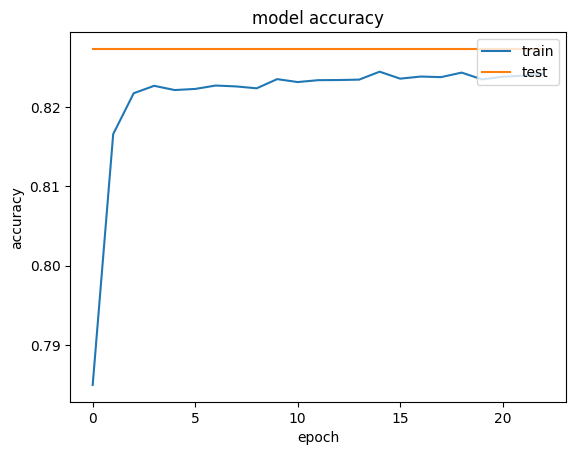

In [67]:
#summarise history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

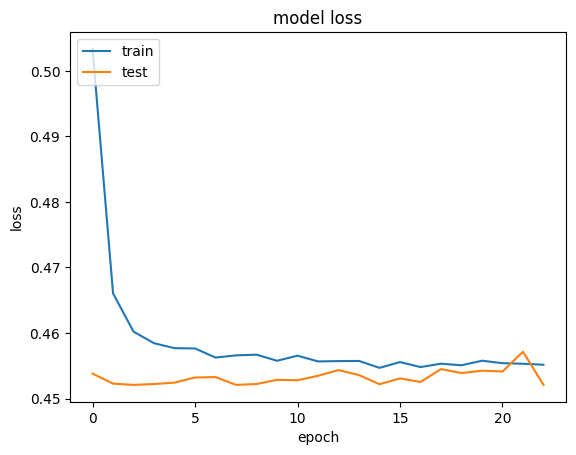

In [68]:
#summarise history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
#prediction
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

1330/1330 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [70]:
confusion_matrix(y_test,y_pred)

array([[30657,  1958],
       [ 5484,  4440]])

In [131]:
evaluate_model("ANN",y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539



In [71]:
#@title 1D-CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
import numpy as np

X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn  = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

print("CNN train shape:", X_train_cnn.shape)
print("CNN test shape:", X_test_cnn.shape)

CNN train shape: (170152, 15, 1)
CNN test shape: (42539, 15, 1)


In [73]:
cnn=Sequential()

In [74]:
#adding 1st conv layer
cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Dropout(0.3))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
#adding 2nd conv layer
cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Dropout(0.3))

In [76]:
#flatten
cnn.add(Flatten())

In [77]:
#adding dense layers
cnn.add(Dense(units=32, activation='relu'))
cnn.add(Dropout(0.3))

In [78]:
#adding 2nd dense layer
cnn.add(Dense(units=16, activation='relu'))

In [79]:
#output
cnn.add(Dense(units=1, activation='sigmoid'))

In [142]:
cnn.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 13, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 13, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 4, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 4, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 2, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,441 (36.88 KB)

 Trainable params: 9,249 (36.13 KB)

 Non-trainable params: 192 (768.00 B)

In [80]:
#early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [85]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [92]:
model_history=cnn.fit(X_train_cnn, y_train,
                      validation_split=0.2,
                      epochs=100,
                      batch_size=32,
                      callbacks=[early_stopping],
                      verbose=1)

Epoch 1/100
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.8231 - loss: 0.4557 - val_accuracy: 0.8283 - val_loss: 0.4510
Epoch 2/100
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.8255 - loss: 0.4518 - val_accuracy: 0.8282 - val_loss: 0.4511
Epoch 3/100
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - accuracy: 0.8221 - loss: 0.4565 - val_accuracy: 0.8283 - val_loss: 0.4507
Epoch 4/100
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - accuracy: 0.8242 - loss: 0.4539 - val_accuracy: 0.8283 - val_loss: 0.4514
Epoch 5/100
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.8230 - loss: 0.4562 - val_accuracy: 0.8279 - val_loss: 0.4508
Epoch 6/100
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.8235 - loss: 0.4549 - val_accuracy: 0.8282 - val_loss: 0.4519
Epoch 7/100
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.8248 - loss: 0.4535 - val_accuracy: 0.8282 - val_loss: 0.4509
Epoch 8/100
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.8243 -

In [93]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

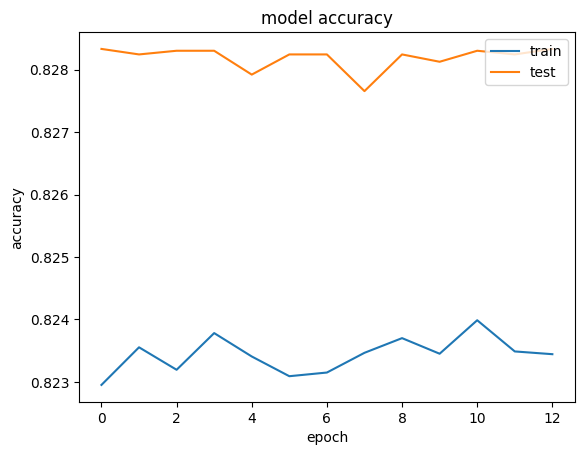

In [94]:
#summarise history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

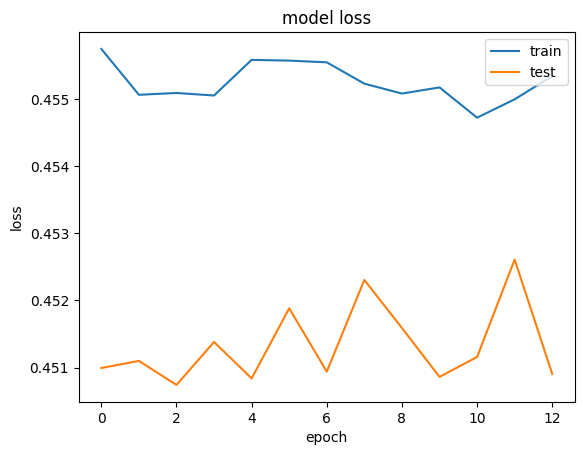

In [95]:
#summarise history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [96]:
#prediction
y_pred_prob = cnn.predict(X_test_cnn)
y_pred = (y_pred_prob > 0.5).astype(int)

1330/1330 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [ ]:
confusion_matrix(y_test,y_pred)

In [97]:
evaluate_model("1D-CNN",y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539



In [98]:
#@title Ensembles

In [113]:
#@title Soft Voting Ensemble: ANN+LightGBM
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [115]:
#scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [116]:
#encoding labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

y_train_enc = np.ravel(y_train_enc)
y_test_enc = np.ravel(y_test_enc)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [118]:
#ANN Model
classifier = Sequential()

classifier.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

classifier.add(Dense(32, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

classifier.add(Dense(16, activation='relu'))

classifier.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.0005)

classifier.compile(optimizer=opt,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

history = classifier.fit(
    X_train_scaled, y_train_enc,
    validation_split=0.33,
    epochs=100,
    batch_size=10,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
11401/11401 ━━━━━━━━━━━━━━━━━━━━ 81s 7ms/step - accuracy: 0.7768 - loss: 0.5174 - val_accuracy: 0.8270 - val_loss: 0.4564
Epoch 2/100
11401/11401 ━━━━━━━━━━━━━━━━━━━━ 100s 9ms/step - accuracy: 0.8102 - loss: 0.4712 - val_accuracy: 0.8273 - val_loss: 0.4536
Epoch 3/100
11401/11401 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - accuracy: 0.8232 - loss: 0.4573 - val_accuracy: 0.8273 - val_loss: 0.4524
Epoch 4/100
11401/11401 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.8259 - loss: 0.4550 - val_accuracy: 0.8273 - val_loss: 0.4553
Epoch 5/100
11401/11401 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - accuracy: 0.8272 - loss: 0.4531 - val_accuracy: 0.8273 - val_loss: 0.4532
Epoch 6/100
11401/11401 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.8274 - loss: 0.4541 - val_accuracy: 0.8273 - val_loss: 0.4521
Epoch 7/100
11401/11401 ━━━━━━━━━━━━━━━━━━━━ 51s 4ms/step - accuracy: 0.8273 - loss: 0.4540 - val_accuracy: 0.8273 - val_loss: 0.4525
Epoch 8/100
11401/11401 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - a

In [119]:
#LightGBM
lgbm_model = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)

lgbm_model.fit(X_train, y_train_enc)

[LightGBM] [Info] Number of positive: 39571, number of negative: 130581
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] Number of data points in the train set: 170152, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.232563 -> initscore=-1.193897
[LightGBM] [Info] Start training from score -1.193897


LGBMClassifier(learning_rate=0.05, n_estimators=400, random_state=42)

In [120]:
ann_prob_test = classifier.predict(X_test_scaled).ravel()
lgbm_prob_test = lgbm_model.predict_proba(X_test)[:, 1]

soft_vote_prob = (ann_prob_test + lgbm_prob_test) / 2.0
soft_vote_pred = (soft_vote_prob > 0.5).astype(int)
print("Soft Voting Ensemble Results:")
evaluate_model("ANN+LightGBM",y_test_enc,soft_vote_pred)
print(classification_report(y_test_enc,soft_vote_pred))
print("AUC:",roc_auc_score(y_test_enc,soft_vote_prob))


1330/1330 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Soft Voting Ensemble Results:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539

AUC: 0.6918289532410138


In [ ]:
#@title Stacking Ensemble

In [121]:
#@title ANN+LightGBM+Logistic Regression
ann_prob_train = classifier.predict(X_train_scaled).ravel()
lgbm_prob_train = lgbm_model.predict_proba(X_train)[:, 1]


5318/5318 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [122]:
X_stack_train = np.column_stack([ann_prob_train, lgbm_prob_train])


In [123]:
stack_model = LogisticRegression()
stack_model.fit(X_stack_train, y_train_enc)


LogisticRegression()

In [124]:
X_stack_test = np.column_stack([ann_prob_test, lgbm_prob_test])
stack_pred = stack_model.predict(X_stack_test)

stack_prob = stack_model.predict_proba(X_stack_test)[:, 1]

In [125]:
print("Stacking Ensemble Results:")
evaluate_model("ANN+LightGBM+LR",y_test_enc,stack_pred)
print(classification_report(y_test_enc,stack_pred))
print("AUC:",roc_auc_score(y_test_enc,stack_prob))

Stacking Ensemble Results:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88     32615
           1       0.65      0.39      0.49      9924

    accuracy                           0.81     42539
   macro avg       0.74      0.66      0.69     42539
weighted avg       0.79      0.81      0.79     42539

AUC: 0.6834704879265462


In [126]:
#@title ROC Curves
fpr_soft, tpr_soft, _ = roc_curve(y_test_enc, soft_vote_prob)
fpr_stack, tpr_stack, _ = roc_curve(y_test_enc, stack_prob)

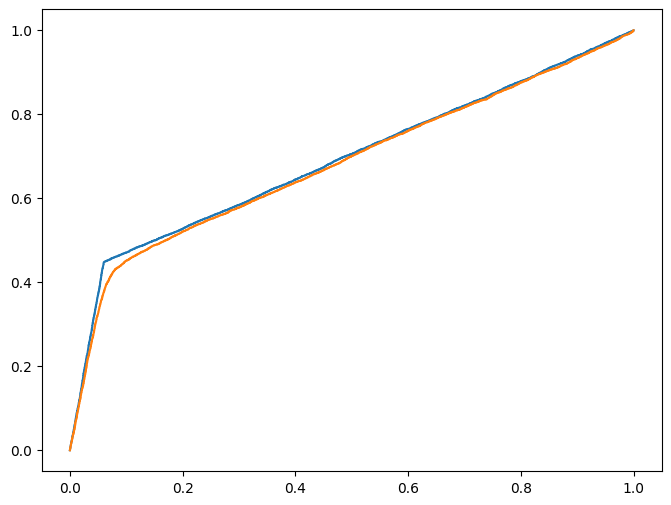

In [127]:
plt.figure(figsize=(8,6))
plt.plot(fpr_soft, tpr_soft, label=f"Soft Voting (AUC={roc_auc_score(y_test_enc, soft_vote_prob):.3f})")
plt.plot(fpr_stack, tpr_stack, label=f"Stacking (AUC={roc_auc_score(y_test_enc, stack_prob):.3f})")

/tmp/ipython-input-3994728631.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


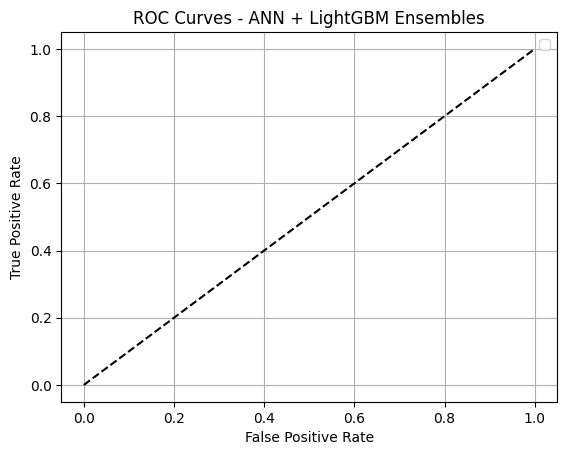

In [129]:
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - ANN + LightGBM Ensembles")
plt.legend()
plt.grid(True)
plt.show()

In [130]:
#@title ANN+CNN+LightGBM+LR


In [131]:
#resizing
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn  = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


In [132]:
cnn = Sequential()

cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu',
               input_shape=(X_train_cnn.shape[1], 1)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Dropout(0.3))

cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Dropout(0.3))

cnn.add(Flatten())

cnn.add(Dense(32, activation='relu'))
cnn.add(Dropout(0.3))

cnn.add(Dense(16, activation='relu'))

cnn.add(Dense(1, activation='sigmoid'))

cnn_opt = Adam(learning_rate=0.0005)
cnn.compile(optimizer=cnn_opt, loss='binary_crossentropy', metrics=['accuracy'])

early_stop_cnn = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

cnn.fit(
    X_train_cnn, y_train_enc,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop_cnn],
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step - accuracy: 0.7624 - loss: 0.5490 - val_accuracy: 0.7841 - val_loss: 0.5035
Epoch 2/50
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.7806 - loss: 0.5044 - val_accuracy: 0.8128 - val_loss: 0.4793
Epoch 3/50
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.7995 - loss: 0.4842 - val_accuracy: 0.8156 - val_loss: 0.4713
Epoch 4/50
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.8069 - loss: 0.4756 - val_accuracy: 0.8198 - val_loss: 0.4689
Epoch 5/50
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.8114 - loss: 0.4708 - val_accuracy: 0.8207 - val_loss: 0.4636
Epoch 6/50
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.8149 - loss: 0.4684 - val_accuracy: 0.8219 - val_loss: 0.4602
Epoch 7/50
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - accuracy: 0.8165 - loss: 0.4646 - val_accuracy: 0.8213 - val_loss: 0.4595
Epoch 8/50
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.8157 - loss: 0

In [133]:
#cnn probabilities
cnn_train_prob = cnn.predict(X_train_cnn).ravel()
cnn_test_prob  = cnn.predict(X_test_cnn).ravel()

5318/5318 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [134]:
#ann probabilities
ann_train_prob = classifier.predict(X_train_scaled).ravel()
ann_test_prob  = classifier.predict(X_test_scaled).ravel()

5318/5318 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [143]:
ndf = df.copy()
ndf.drop('Diagnosis',axis=1,inplace=True)


In [145]:
X_train_fixed = X_train[:, :14]
X_test_fixed  = X_test[:, :14]

lgbm_train_prob = lgbm_model.predict_proba(X_train_fixed)[:, 1]
lgbm_test_prob  = lgbm_model.predict_proba(X_test_fixed)[:, 1]

In [146]:
#superstacking features
X_super_stack_train = np.column_stack([
    ann_train_prob,
    cnn_train_prob,
    lgbm_train_prob
])

X_super_stack_test = np.column_stack([
    ann_test_prob,
    cnn_test_prob,
    lgbm_test_prob
])

In [147]:
#meta learner(LR)
from sklearn.linear_model import LogisticRegression
super_stack_model = LogisticRegression()
super_stack_model.fit(X_super_stack_train, y_train_enc)

super_stack_pred = super_stack_model.predict(X_super_stack_test)
super_stack_prob = super_stack_model.predict_proba(X_super_stack_test)[:, 1]

In [149]:
print("Super Stacking Ensemble:")
evaluate_model("ANN+CNN+LightGBM+LR",y_test_enc,super_stack_pred)


Super Stacking Ensemble:


{'accuracy': 0.8250546557276852,
 'f1_score': 0.810644000930149,
 'recall': 0.8250546557276852,
 'precision': 0.8122654260064036}

In [151]:
confusion_matrix(y_test_enc,super_stack_pred)
print(classification_report(y_test_enc,super_stack_pred))
print("AUC:",roc_auc_score(y_test_enc,super_stack_prob))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539

AUC: 0.692727157795845


In [153]:
#lr prob
lr_prob = stack_model.predict_proba(X_stack_test)[:, 1]


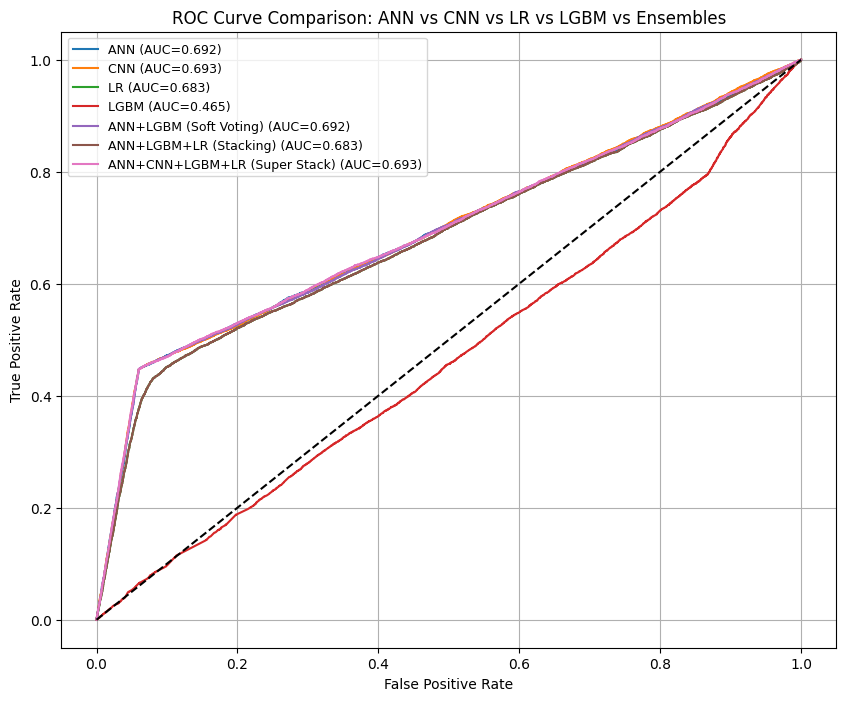

In [154]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

models = {
    "ANN": ann_test_prob,
    "CNN": cnn_test_prob,
    "LR": lr_prob,   # logistic regression meta-model alone
    "LGBM": lgbm_test_prob,
    "ANN+LGBM (Soft Voting)": soft_vote_prob,
    "ANN+LGBM+LR (Stacking)": stack_prob,
    "ANN+CNN+LGBM+LR (Super Stack)": super_stack_prob
}

for name, prob in models.items():
    fpr, tpr, _ = roc_curve(y_test_enc, prob)
    auc_val = roc_auc_score(y_test_enc, prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_val:.3f})")

plt.plot([0,1],[0,1],'k--')  # diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: ANN vs CNN vs LR vs LGBM vs Ensembles")
plt.legend(fontsize=9)
plt.grid(True)
plt.show()
